<a href="https://colab.research.google.com/github/farahhkhalil/Codealpha/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

**Data Exploration**/ **cleaning**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# filling the age null values with the mean age
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# filling null values of embarked
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
# dropping the cabin column since it has a lot of null values that can't be filled
df.drop(columns=['Cabin'], inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Data** **Visualization**

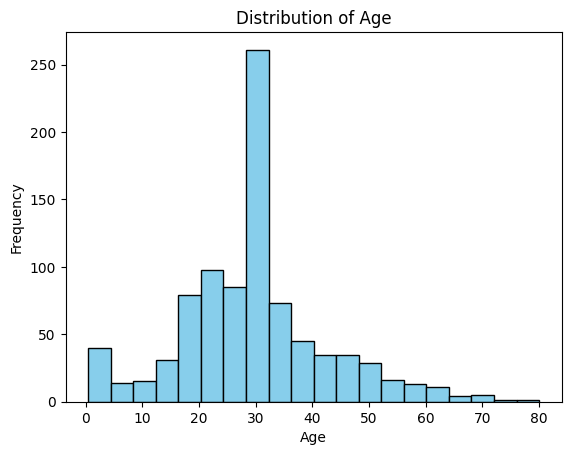

In [ ]:
# histogram
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')


plt.show()

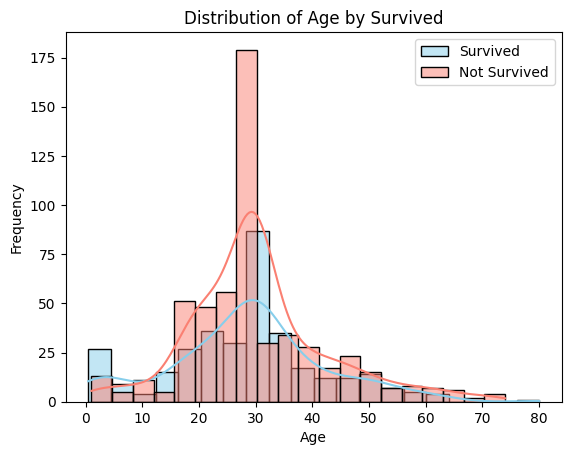

In [ ]:
# dividing the data of survivors and non-survivors
survived = df[df['Survived'] == 1]['Age'].dropna()
not_survived = df[df['Survived'] == 0]['Age'].dropna()

sns.histplot(survived, bins=20, color='skyblue', kde=True, label='Survived')
sns.histplot(not_survived, bins=20, color='salmon', kde=True, label='Not Survived')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Survived')
plt.legend()

plt.show()

<ipython-input-23-49013353a455>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='pastel')


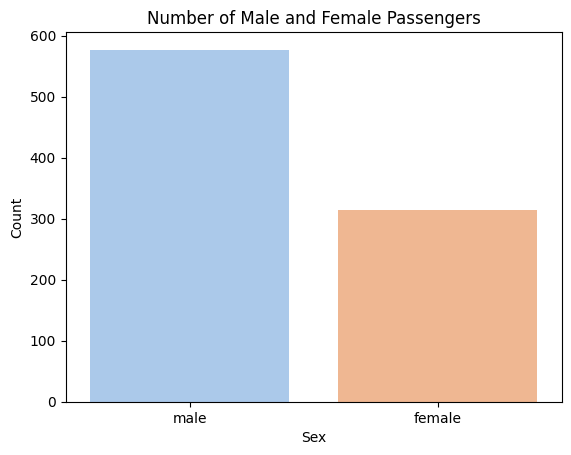

In [ ]:
# showing the number of males and females on the boat
sns.countplot(data=df, x='Sex', palette='pastel')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Male and Female Passengers')

plt.show()

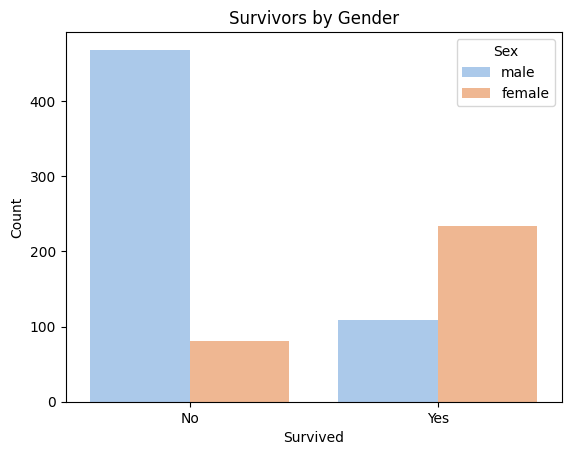

In [ ]:
# Survivors by Gender
sns.countplot(data=df, x='Survived', hue='Sex', palette='pastel')

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survivors by Gender')

plt.show()


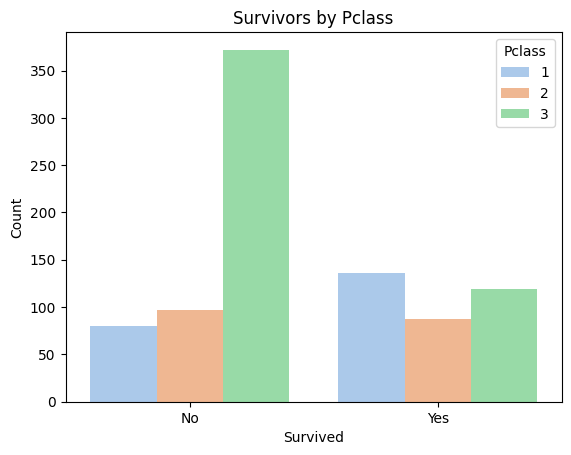

In [ ]:
# Survivors by ride Pclass
sns.countplot(data=df, x='Survived', hue='Pclass', palette='pastel')

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survivors by Pclass')

plt.show()

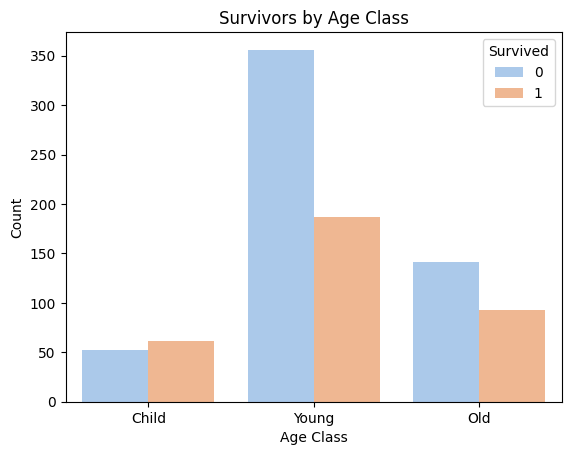

In [ ]:
# Survivors by age
age_bins = [0, 18, 35, df['Age'].max()]
age_labels = ['Child', 'Young', 'Old']

# Categorize ages into classes without creating a new column
df['Age'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

sns.countplot(data=df, x='Age', hue='Survived', palette='pastel')

plt.xlabel('Age Class')
plt.ylabel('Count')
plt.title('Survivors by Age Class')

plt.show()

<Axes: >

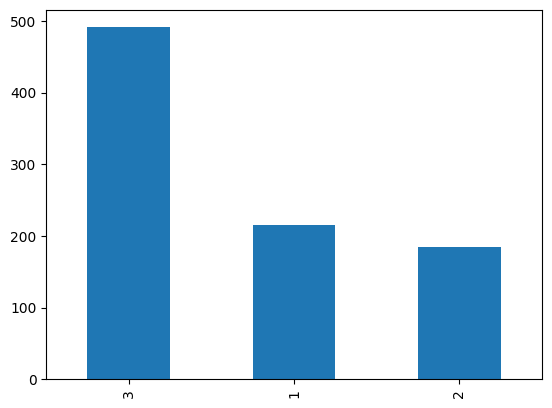

In [ ]:
pd.value_counts(df["Pclass"]).plot.bar()

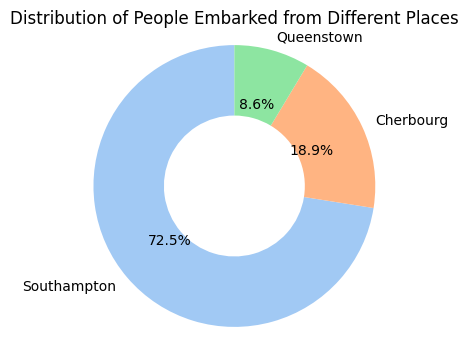

In [ ]:
# Extra virsualization for embarked column
embarked_counts = df['Embarked'].value_counts()

labels = ['Southampton', 'Cherbourg', 'Queenstown']  # City names
sizes = embarked_counts.values.tolist()

colors = sns.color_palette('pastel')

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.5))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

centre_circle = plt.Circle((0, 0), 0.40, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Distribution of People Embarked from Different Places')
plt.show()

**Data** **Training**

In [ ]:
df1 = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
# Removing un necessary columns

df1.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [ ]:
# train/test/split
X_train,X_test,y_train,y_test = train_test_split(df1.drop(columns=['Survived']),
                                                 df1['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [ ]:
# Applying imputation

si_age = SimpleImputer()
si_embarked = SimpleImputer(strategy='most_frequent')

X_train_age = si_age.fit_transform(X_train[['Age']])
X_train_embarked = si_embarked.fit_transform(X_train[['Embarked']])

X_test_age = si_age.transform(X_test[['Age']])
X_test_embarked = si_embarked.transform(X_test[['Embarked']])

In [ ]:
# One Hot Encoding for each categorical feature
ohe_sex = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe_embarked = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_sex = ohe_sex.fit_transform(X_train[['Sex']])
X_train_embarked = ohe_embarked.fit_transform(X_train[['Embarked']])
X_test_sex = ohe_sex.transform(X_test[['Sex']])
X_test_embarked = ohe_embarked.transform(X_test[['Embarked']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_embarked

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [ ]:
# dropping encoded columns
X_train_rem = X_train.drop(columns=['Sex','Age','Embarked'])

X_test_rem = X_test.drop(columns=['Sex','Age','Embarked'])

In [ ]:
# Concatenating the dataframes
import numpy as np

X_train_transformed = np.concatenate((X_train_rem, X_train_age, X_train_sex, X_train_embarked), axis=1)
X_test_transformed = np.concatenate((X_test_rem, X_test_age, X_test_sex, X_test_embarked), axis=1)

In [ ]:
# applying decision trees algorithm
model = DecisionTreeClassifier()
model.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [ ]:
# prediction testing
y_pred = model.predict(X_test_transformed)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [ ]:
# checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.770949720670391